# Constrained Optimization 
## Analytical and numerical approaches

This notebook contains some interactive graphical examples and a simple sample numerical constrained optimization.  This notebook uses widgets from the `ipywidgets` library which will not be rendered in a static view. 

### Consumer's optimization problem:

The consumer chooses a consumption bundle $(x_0, x_1$ to solve:

$$\max_{x_0,x_1} U(x_0,x_1) $$

subject to a budget constraint

$$p \cdot x_0 + x_1 \leq I $$

where $p=\frac{p_{0}}{p_{1}}$ is the relative price of good 0 measured in terms of units of good 1.

If we choose a Cobb-Douglas utility function of the form

$$
U(x_0, x_1) = \alpha \cdot log(x_0) + (1-\alpha) \cdot log(x_1)
$$

We can solve for the Marshallian demands in a variety of ways. For example by using the binding budget constraint to substitute for $x_1$ to solve for the uncontrained maximum in $x_0$ in

$$
\max_{x_0}  \alpha \cdot log(x_0) + (1-\alpha) \cdot log(I - p \cdot x_0)
$$

The first-order necessary condition (FOC) for an interior optimum, $\frac{\alpha}{x_0} = p \cdot \frac{1-\alpha}{I-p \cdot x_0}$, can be solved to give us the Marshallian demand function for $x_0(p, I)$, and $x_1(p,I)$:

$$
\begin{aligned}
x_0^* &= \alpha \cdot \frac{I}{p}  \\
x_1^* &= (1-\alpha) \cdot I
\end{aligned}
$$

If we substitute in prices, income and the share parameter we find the vector of Marshallian demands $[x_0^*, x_1^*]$ from which we can also find the indirect utility funtion $V(p,I) =U(x_0^*, x_1^*)$.

We've written some python functions for the graphs and numerical solutions below, most of which are placed in the [cd](..\cd.py) library (cd for Cobb-Douglas).

In [1]:
import sys
from IPython.display import display, Latex
sys.path.insert(0,'..')  
from cd import *    # import cobb douglas python library of functions

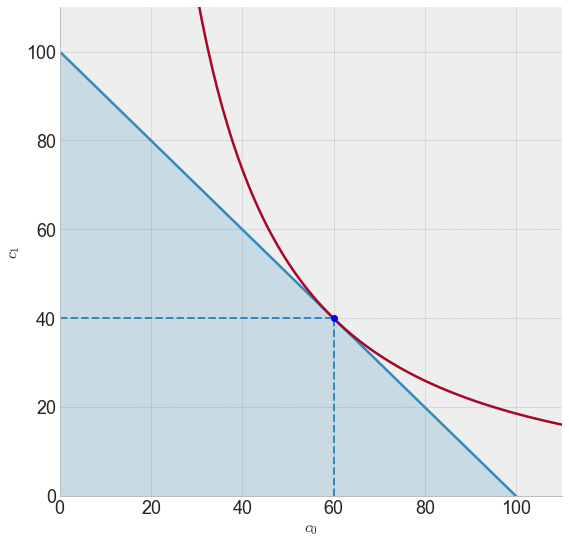

In [2]:
consume_plot(p=1, I=100, a = 0.6)

In the next cell control plot parameters with sliders (will only display if running with live kernel)

interactive(children=(FloatSlider(value=1.2000000000000002, description='p', max=2.0, min=0.5), IntSlider(valu…

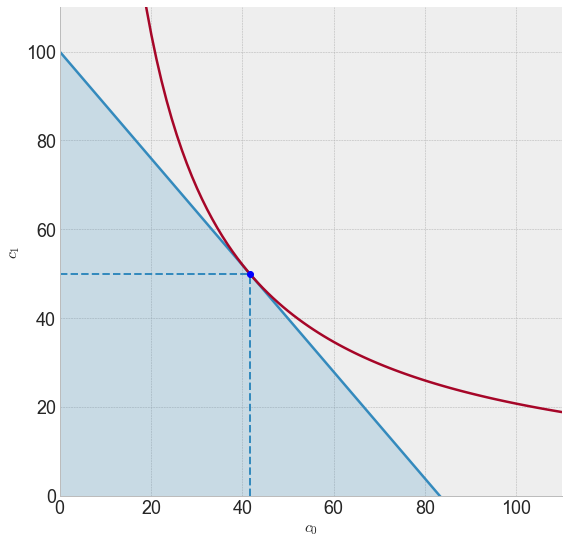

In [3]:
interact(consume_plot, p=(0.5,2,0.1), I=(50,150,10), a=(0.1,0.9,0.1));

Move the slider to move the consumption point along the budget line. Keep adjusting until we reach the highest indifference curve at a tangency point.

## The 'no-arbitrage' argument 

In the diagram below we've guessed that the optimum is the point along the budget constraint $(x_0, x_1)=(20, 80)$ but when we check this, we verify that

$$
\frac{MU_0}{p_0} > \frac{MU_1}{p_1}
$$

Since the marginal utility per dollar spent on good 0 is larger than the marginal utility per dollar spent on good 1, utility can be increased by moving some spending from good 0 to good 1.

In [4]:
alpha = 0.6
p = 1
I = 100

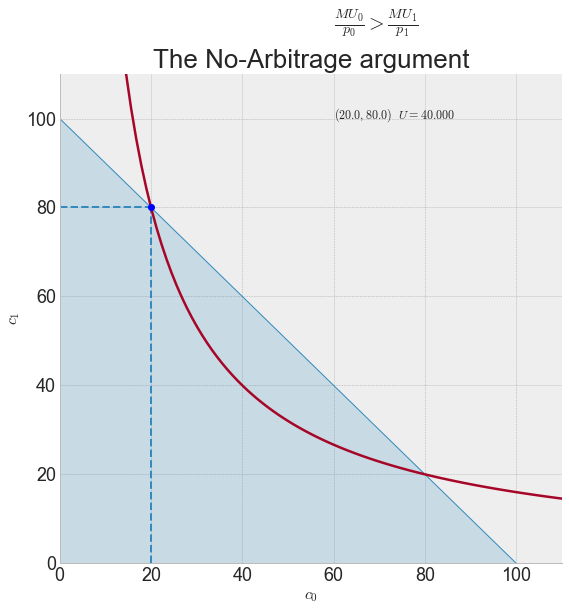

In [5]:
arb_plot(c0g=20, I=100, p=1)

In the next interactive diagram, we can move the sliders (this will only change the display if running this notebook with live kernel) to find the optimum.

In [6]:
interact(arb_plot, c0g=(1,I,0.1), I=(50,150,10), p=fixed(1));

interactive(children=(FloatSlider(value=20.0, description='c0g', min=1.0), IntSlider(value=100, description='I…

# Numerical constrained optimization with python

The problem we have been solving can be easily solved analytically (i.e. we can derive formulas for Marshallian demands) but it's useful to also see how this type of constrained optimization problem can be solved numerically using the `scipy.opimize` library.

The `demands(p, I)` function takes $p$ and $I$ and $\alpha$ as paramterers to maximize u (or, same, minimize -u) subject to the budget constraint using scipy's `minimize` (which :

In [7]:
def demands(p, I, a= alpha):
    
    def budget(x):
        return np.array([p*x[0] + x[1] - I])
    
    def negU(x):
        return -u(x, a)

    x = np.array([(I/2)/p, (I/2)])  # initial guess -- spend half I on each good
    ux = minimize(negU, x, constraints = ({'type': 'eq', 'fun' : budget }) )
    return ux.x

Suppose $p=1, I=100$ and the Cobb-Douglass share parameter is $\alpha = 0.7$). Demands for $x_0$ and $x_1$ are found to be:

In [8]:
[x0opt, x1opt] = demands(1, 100, 0.7)

In [23]:
display(Latex(f'(x_0^*, x_1^*) = ({x0opt:0.1f}, {x1opt:0.1f})'))
display(Latex(f'$u(x_0^*, x_1^*)$ = {u([x0opt, x1opt], 0.7):0.1f}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

The same solution we obtain from analytical formulas:

In [15]:
%%latex
\begin{align}
x \cdot x
\end{align}

<IPython.core.display.Latex object>

In [12]:
%%latex
\begin{align}
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}


<IPython.core.display.Latex object>

In [10]:
cd_demands(1,100, 0.7)

([70.0, 30.000000000000004], 54.28814526898254)

Finally let's setup a simple widget to let us see the consumer optimum changes with parameters.

Will only display if run with a live kernel.

In [11]:
interact(demands, p=(0.2,2,0.1), I = (50, 200, 10), a =(0.2, 0.8, 0.1));

interactive(children=(FloatSlider(value=1.1, description='p', max=2.0, min=0.2), IntSlider(value=120, descript…